In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle
from scipy import ndimage
from scipy.misc import imresize
%matplotlib inline
plt.style.use('ggplot')

pixel_depth = 255.0
screen_width = 32
screen_height = 32

In [2]:
try:
    with open('svhn.pickle', 'rb') as f:
        dataset = pickle.load(f)

except Exception as e:
    print('Unable to process data from dataset.pickle', ':', e)
    raise


In [13]:
def load_image(image_file, path='train/', **box):
    """Load the data for a single digit label."""
    image_data = np.average(ndimage.imread(path+image_file), axis=2)
    if box['minTop'] <= 0: box['minTop'] = 0
    if box['minLeft'] <= 0: box['minLeft'] = 0
    image_data = image_data[box['minTop']:box['maxLeftWidth'], box['minLeft']:box['maxLeftWidth']]
    image_data = imresize(image_data, (32,32))
    image_data = (image_data.astype(float) - pixel_depth/2) / pixel_depth
    return image_data

In [9]:
def load_images(dataset, struct):
    images = dataset[struct]['images']
    tops = dataset[struct]['tops']
    widths = dataset[struct]['widths']
    heights = dataset[struct]['heights']
    lefts = dataset[struct]['lefts']
    data = np.ndarray(shape=(images.shape[0], 32, 32), dtype=np.float32)
    for i in range(data.shape[0]):
        if (i % 5000 == 0):
            print(i, " out of ", data.shape[0], " is done for ", struct)
        try:
            if struct == 'valid':
                path = 'extra/'
            else:
                path = struct + '/'
            digitCount = dataset[struct]['labels'][i][dataset[struct]['labels'][i] > -1].shape[0]
            topHeights = np.array([tops[i][:digitCount], heights[i][:digitCount]])
            leftWidths = np.array([lefts[i][:digitCount], widths[i][:digitCount]])
            # Defined box to crop single digit image, now load image
            image = load_image(images[i], path, **{
                    "minTop": min(topHeights[0, :]),
                    "minLeft": min(leftWidths[1, :]),
                    "maxTopHeight": topHeights.sum(axis=0).max(),
                    "maxLeftWidth": leftWidths.sum(axis=0).max()
                })
            data[i, :, :] = image
        except IOError as e:
            img = np.average(ndimage.imread(path+images[i]), axis=2)
            print(i, digitCount, img.shape, {
                    "minTop": min(topHeights[0, :]),
                    "minLeft": min(leftWidths[1, :]),
                    "maxTopHeight": topHeights.sum(axis=0).max(),
                    "maxLeftWidth": leftWidths.sum(axis=0).max(),
                    "lefts": lefts[i],
                    "widths": widths[i],
                    "message": e.message
                })
            return
    return data
        

In [15]:
train_X = load_images(dataset, 'train')
test_X = load_images(dataset, 'test')
valid_X = load_images(dataset, 'valid')
extra_X = load_images(dataset, 'extra')

(0, ' out of ', 33402, ' is done for ', 'train')


/home/amywu/anaconda3/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(5000, ' out of ', 33402, ' is done for ', 'train')
(10000, ' out of ', 33402, ' is done for ', 'train')
(15000, ' out of ', 33402, ' is done for ', 'train')
(20000, ' out of ', 33402, ' is done for ', 'train')
(25000, ' out of ', 33402, ' is done for ', 'train')
(30000, ' out of ', 33402, ' is done for ', 'train')
(0, ' out of ', 13068, ' is done for ', 'test')
(5000, ' out of ', 13068, ' is done for ', 'test')
(10000, ' out of ', 13068, ' is done for ', 'test')
(0, ' out of ', 2000, ' is done for ', 'valid')
(0, ' out of ', 202353, ' is done for ', 'extra')
(5000, ' out of ', 202353, ' is done for ', 'extra')
(10000, ' out of ', 202353, ' is done for ', 'extra')
(15000, ' out of ', 202353, ' is done for ', 'extra')
(20000, ' out of ', 202353, ' is done for ', 'extra')
(25000, ' out of ', 202353, ' is done for ', 'extra')
(30000, ' out of ', 202353, ' is done for ', 'extra')
(35000, ' out of ', 202353, ' is done for ', 'extra')
(40000, ' out of ', 202353, ' is done for ', 'extra')
(45

In [16]:
train_Y = dataset['train']['labels']
test_Y = dataset['test']['labels']
valid_Y = dataset['valid']['labels']
extra_Y = dataset['extra']['labels']

try:
    with open('images_tensorflow.pickle', 'wb') as f:
        pickle.dump({
                'train': {'feature': train_X, 'label': train_Y},
                'test': {'feature': test_X, 'label': test_Y},
                'valid': {'feature': valid_X, 'label': valid_Y},
                'extra': {'feature': extra_X, 'label': extra_Y}
            }, f, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', struct + '.pickle',':', e)

Let's verify the data still looks good.

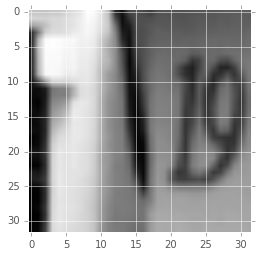

In [19]:
plt.imshow(train_X[0], cmap='gray')

In [20]:
train_Y[0]

array([  1.,   9.,  10.,  10.,  10.,  10.])

[  1.   9.  10.  10.  10.  10.]


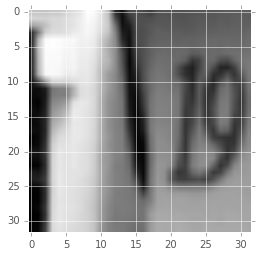

In [23]:
pickle_file = 'images_tensorflow.pickle' # index 0 should be all As, 1 = all Bs, etc.
with open(pickle_file, 'rb') as f:
    digit_set = pickle.load(f) # unpickle
    print(digit_set['train']['label'][0])
    plt.figure()
    plt.imshow(digit_set['train']['feature'][0],cmap='gray') # display it
